In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, f1_score

## Linear Regression


In [189]:
df = pd.read_csv("./datasets/dataset_colesterol.csv")

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [191]:
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23
5,6,B,Não,Baixo,68,66.8,170,185.31
6,7,A,Sim,Baixo,60,117.3,181,289.33
7,8,O,Sim,Moderado,35,86.9,174,216.48
8,9,O,Não,Baixo,62,81.3,166,235.30
9,10,B,Sim,Alto,44,32.7,165,97.79


In [192]:
# Drop "Id" column
df.drop(columns=["Id"], axis=1, inplace=True)

# Apply OneHotEncoding on categorial columns
df = pd.get_dummies(df, columns=["Grupo Sanguíneo", "Fumante", "Nível de Atividade"])

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   int64  
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   int64  
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   uint8  
 5   Grupo Sanguíneo_AB           1000 non-null   uint8  
 6   Grupo Sanguíneo_B            1000 non-null   uint8  
 7   Grupo Sanguíneo_O            1000 non-null   uint8  
 8   Fumante_Não                  1000 non-null   uint8  
 9   Fumante_Sim                  1000 non-null   uint8  
 10  Nível de Atividade_Alto      1000 non-null   uint8  
 11  Nível de Atividade_Baixo     1000 non-null   uint8  
 12  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(2), int6

In [194]:
X = df.drop(columns=["Colesterol"], axis=1)
y = df["Colesterol"]

In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=51
)

In [196]:
def get_regression_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return root_mean_squared_error(y_test, y_pred)

In [197]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [198]:
baseline_perf = get_regression_performance(reg_model, X_test, y_test)
print(f"Baseline RMSE: {baseline_perf}")

Baseline RMSE: 9.017674671581473


### Linear Regression with RFE


In [199]:
rfe_method = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe_method.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [200]:
def show_selected_features(X_train, method):
    selected_features = X_train.columns[method.get_support()]

    print("Selected features:")
    for feature in selected_features:
        print(f"- {feature}")

In [201]:
show_selected_features(X_train, rfe_method)

Selected features:
- Peso
- Altura
- Grupo Sanguíneo_AB
- Fumante_Não
- Nível de Atividade_Alto


In [202]:
def show_feature_ranking(fs_method, X_train):
    ranking = fs_method.ranking_
    features = X_train.columns.to_list()

    df_ranking = pd.DataFrame({"Feature": features, "Ranking": ranking})
    df_ranking = df_ranking.sort_values(by="Ranking")

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Ranking", y="Feature", data=df_ranking)
    plt.show()

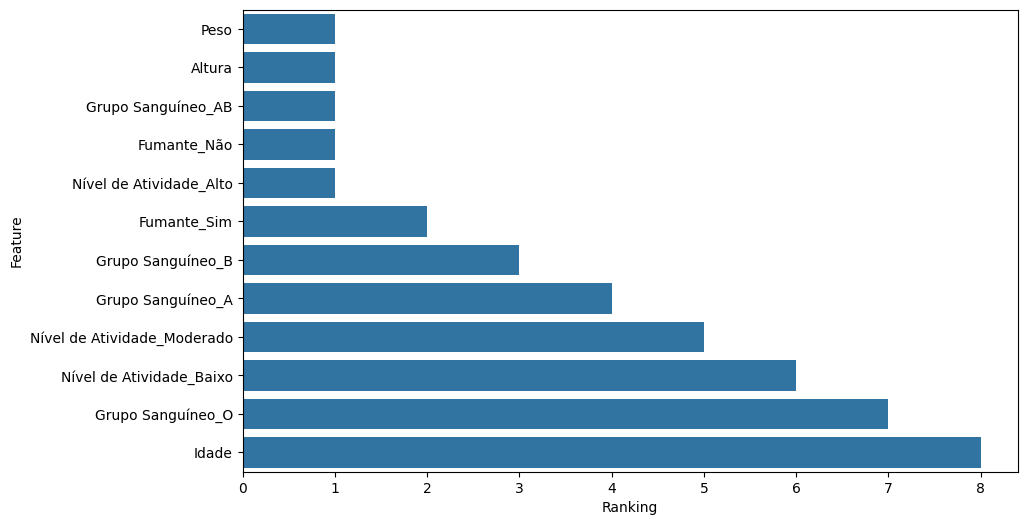

In [203]:
show_feature_ranking(rfe_method, X_train)

In [204]:
rfe_perf = get_regression_performance(rfe_method, X_test, y_test)
print(f"RFE performance: {rfe_perf:.4f}")

RFE performance: 8.9488


### Linear Regression with RFECV


In [205]:
rfecv_method = RFECV(estimator=LinearRegression(), min_features_to_select=5, cv=5)
rfecv_method.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), min_features_to_select=5)

In [206]:
show_selected_features(X_train, rfecv_method)

Selected features:
- Peso
- Altura
- Grupo Sanguíneo_A
- Grupo Sanguíneo_AB
- Grupo Sanguíneo_B
- Fumante_Não
- Fumante_Sim
- Nível de Atividade_Alto
- Nível de Atividade_Baixo
- Nível de Atividade_Moderado


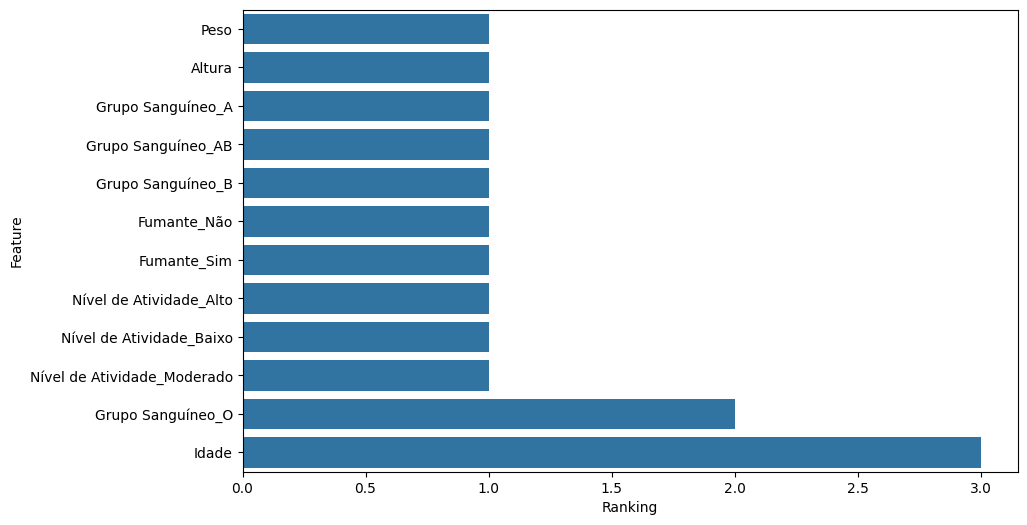

In [207]:
show_feature_ranking(rfecv_method, X_train)

In [208]:
rfe_perf = get_regression_performance(rfecv_method, X_test, y_test)
print(f"RFE performance: {rfe_perf:.4f}")

RFE performance: 9.0229


### Linear Regression with SelectFromModel


In [209]:
sfm_method = SelectFromModel(estimator=reg_model, max_features=5, threshold=0.5)
sfm_method.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression(), max_features=5, threshold=0.5)

In [210]:
show_selected_features(X_train, sfm_method)

Selected features:
- Peso
- Altura
- Grupo Sanguíneo_AB
- Fumante_Sim
- Nível de Atividade_Alto


In [211]:
X_train_sfm = sfm_method.transform(X_train)
X_test_sfm = sfm_method.transform(X_test)
reg_model.fit(X_train_sfm, y_train)

LinearRegression()

In [212]:
performance = get_regression_performance(reg_model, X_test_sfm, y_test)
print(f"Performance: {performance:.4f}")

Performance: 8.9488


## Logistic Regression


In [213]:
df = pd.read_csv("./datasets/fruit_quality.csv")

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [215]:
df.drop("A_id", axis=1, inplace=True)
df["Quality"] = df["Quality"].map({"bad": 0, "good": 1})

In [216]:
df.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


In [217]:
X = df.drop(columns=["Quality"], axis=1)
y = df["Quality"]

In [218]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=51
)

In [219]:
def get_classification_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

In [220]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [221]:
baseline_perf = get_classification_performance(model, X_test, y_test)
print(f"Baseline F1 Score: {baseline_perf:.4f}")

Baseline F1 Score: 0.7788


### Logistic Regression with RFE


In [222]:
rfe_method = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe_method.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [223]:
show_selected_features(X_train, rfe_method)

Selected features:
- Size
- Weight
- Sweetness
- Juiciness
- Acidity


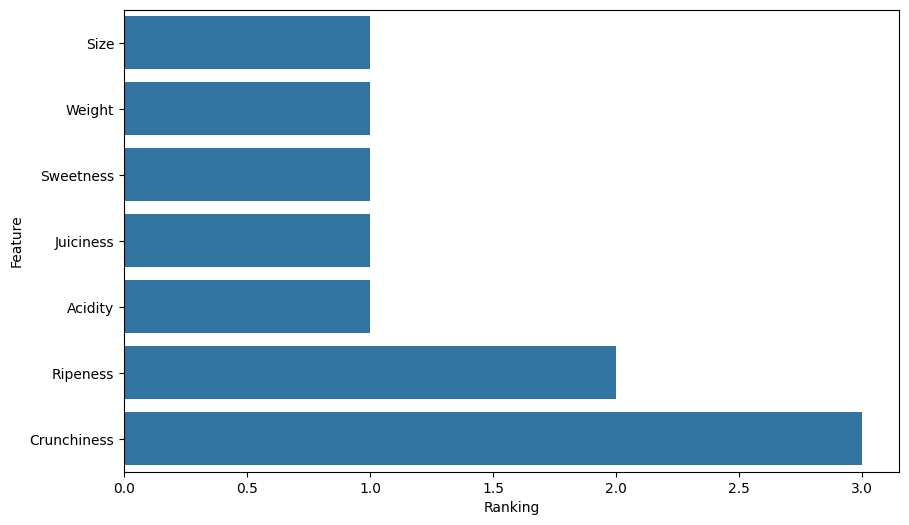

In [224]:
show_feature_ranking(rfe_method, X_train)

In [225]:
get_classification_performance(rfe_method, X_test, y_test)

0.7738193869096934

### Logistic Regression with RFECV


In [226]:
rfecv_method = RFECV(
    estimator=LogisticRegression(),
    min_features_to_select=2,
    cv=5,
    scoring="f1_weighted",
)
rfecv_method.fit(X_train, y_train)

RFECV(cv=5, estimator=LogisticRegression(), min_features_to_select=2,
      scoring='f1_weighted')

In [227]:
show_selected_features(X_train, rfecv_method)

Selected features:
- Size
- Weight
- Sweetness
- Juiciness
- Ripeness
- Acidity


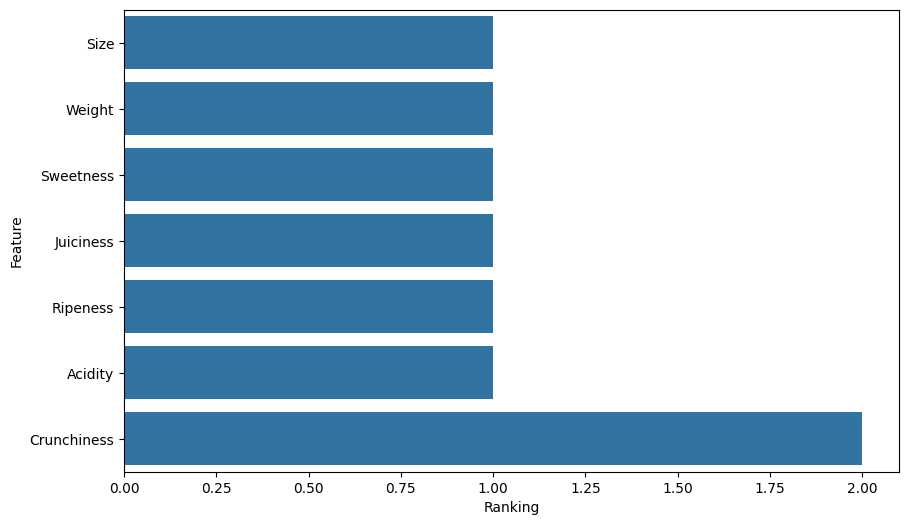

In [228]:
show_feature_ranking(rfecv_method, X_train)

In [229]:
get_classification_performance(rfecv_method, X_test, y_test)

0.7767634854771784

### Logistic Regression with SelectFromModel


In [258]:
lr_model = LogisticRegression()
sfm_method = SelectFromModel(estimator=lr_model, max_features=5)
sfm_method.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(), max_features=5)

In [259]:
show_selected_features(X_train, sfm_method)

Selected features:
- Size
- Sweetness
- Juiciness


In [260]:
X_train_sfm = sfm_method.transform(X_train)
X_test_sfm = sfm_method.transform(X_test)
lr_model.fit(X_train_sfm, y_train)

LogisticRegression()

In [261]:
get_classification_performance(lr_model, X_test_sfm, y_test)

0.7141659681475272